<a href="https://colab.research.google.com/github/Narges1244/Pytorch_tutorial/blob/main/intro_to_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
#reshape and view
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [5]:
#Reshape if we don't know the number of items using -1
my_torch2 = torch.arange(10)
my_torch2

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
my_torch2 = my_torch2.reshape(2,-1)
my_torch2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [7]:
my_torch3 = torch.arange(10)
my_torch3

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
my_torch3 = my_torch3.view(2,5)
my_torch3

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [9]:
my_torch4 = torch.arange(10)
my_torch4

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
my_torch5 = my_torch4.reshape(2,5)
my_torch5

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [11]:
my_torch4[1] = 1020
my_torch4

tensor([   0, 1020,    2,    3,    4,    5,    6,    7,    8,    9])

In [12]:
my_torch5

tensor([[   0, 1020,    2,    3,    4],
        [   5,    6,    7,    8,    9]])

In [13]:
#slice
my_torch6 = torch.arange(10)
my_torch6

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
# grab a spesific number
my_torch6[7]

tensor(7)

In [15]:
my_torch6 = my_torch6.reshape(5,2)
my_torch6

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [16]:
my_torch6[:,1]

tensor([1, 3, 5, 7, 9])

In [17]:
my_torch6[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

In [18]:
tensor_a = torch.tensor([1,2,3,4])
tensor_b = torch.tensor([5,6,7,8])

In [19]:
tensor_a + tensor_b

tensor([ 6,  8, 10, 12])

In [20]:
# another adition
torch.add(tensor_a,tensor_b)

tensor([ 6,  8, 10, 12])

In [21]:
# substarct
tensor_b - tensor_a

tensor([4, 4, 4, 4])

In [22]:
# subfunction
torch.sub(tensor_b, tensor_a)

tensor([4, 4, 4, 4])

In [23]:
# create a Model class that inherits nn.Module
class Model(nn.Module):
  def __init__(self, in_features =4 , h1=8, h2 = 9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x



In [24]:
torch.manual_seed(41)
model = Model()

In [25]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [26]:
# change last column from string to integer
my_df['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor',1.0)
my_df['variety'] = my_df['variety'].replace('Virginica',2.0)
my_df.head()

/tmp/ipython-input-3377206044.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica',2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [27]:
#train test split
x = my_df.drop('variety', axis = 1).values
y = my_df['variety'].values

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 41)

In [30]:
# convert x feture to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [31]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [46]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.018)

In [47]:
#train our model
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.item())
  if i%10 == 0:
    print(f'Epoch:{i} and loss:{loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:0 and loss:0.21886824071407318
Epoch:10 and loss:0.11428549140691757
Epoch:20 and loss:0.06348488479852676
Epoch:30 and loss:0.04335884004831314
Epoch:40 and loss:0.0337793305516243
Epoch:50 and loss:0.02891652099788189
Epoch:60 and loss:0.025765011087059975
Epoch:70 and loss:0.023551011458039284
Epoch:80 and loss:0.021810544654726982
Epoch:90 and loss:0.020345989614725113


In [48]:
print("epochs =", epochs, "type =", type(epochs))
print("losses type =", type(losses), "len =", len(losses))

print("first 5 losses + types:")
for i, v in enumerate(losses[:5]):
    print(i, v, type(v))


epochs = 100 type = <class 'int'>
losses type = <class 'list'> len = 100
first 5 losses + types:
0 0.21886824071407318 <class 'float'>
1 0.20495644211769104 <class 'float'>
2 0.20257782936096191 <class 'float'>
3 0.18258528411388397 <class 'float'>
4 0.17965713143348694 <class 'float'>


Text(0.5, 0, 'epochs')

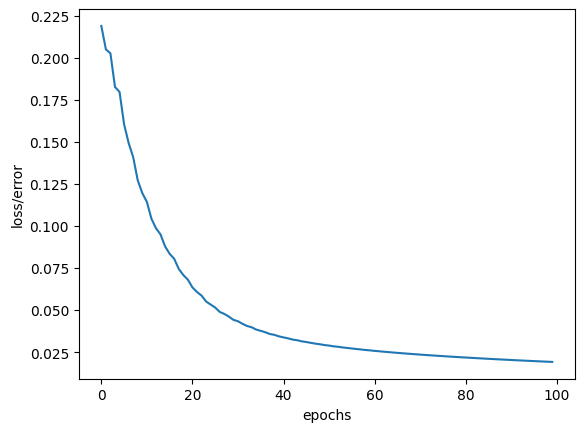

In [49]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('epochs')

In [50]:
#evaluate Model on Test Data
with torch.no_grad():
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test)


In [51]:
loss

tensor(0.1624)

In [63]:
correct = 0
model.eval()

with torch.no_grad():
    for i, x in enumerate(x_test):
        y_val = model(x)                 # preferred over model.forward(...)
        pred = y_val.argmax().item()

        true = y_test[i].item() if torch.is_tensor(y_test[i]) else int(y_test[i])

        print(f"{i+1}.) {y_val} \t true:{true} \t pred:{pred}")

        if pred == true:
            correct += 1

print(f"\n{correct} out of {len(y_test)}")


1.) tensor([-16.0924,   3.4815,   7.8809]) 	 true:2 	 pred:2
2.) tensor([-23.9743,   2.4063,  15.5607]) 	 true:2 	 pred:2
3.) tensor([-25.1795,   3.1153,  15.3854]) 	 true:2 	 pred:2
4.) tensor([-6.8413,  5.5172, -2.3769]) 	 true:1 	 pred:1
5.) tensor([-20.6990,   3.3950,  11.5268]) 	 true:2 	 pred:2
6.) tensor([-3.7699,  5.5539, -5.1213]) 	 true:1 	 pred:1
7.) tensor([-15.2928,   4.0587,   6.3752]) 	 true:2 	 pred:2
8.) tensor([-6.7315,  5.5935, -2.5945]) 	 true:1 	 pred:1
9.) tensor([-17.9590,   3.7414,   8.8970]) 	 true:2 	 pred:2
10.) tensor([-25.4136,   2.4935,  16.5176]) 	 true:2 	 pred:2
11.) tensor([-14.2774,   4.1704,   5.4161]) 	 true:2 	 pred:2
12.) tensor([ 13.0434,   3.9937, -18.6575]) 	 true:0 	 pred:0
13.) tensor([ 11.7385,   3.7245, -16.9008]) 	 true:0 	 pred:0
14.) tensor([-1.8169,  4.7997, -5.6568]) 	 true:1 	 pred:1
15.) tensor([ 10.6138,   4.1222, -16.5261]) 	 true:0 	 pred:0
16.) tensor([-12.5512,   4.4892,   3.5983]) 	 true:2 	 pred:1
17.) tensor([ 11.7837,   3.83